In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### Reading the data.

In [2]:
dataset = pd.read_csv("D:\DEEP_Learning(UDEMY)\ARTIFCIAL_NEURAL_NETWORK\Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
round((dataset.isnull().sum()/len(dataset.index)*100),2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [5]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
import seaborn as sns

In [7]:
dataset.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [8]:
dataset['Credit_score_new']=pd.cut(dataset['CreditScore'],bins=[350,500,700,800,900],
labels=["Bad","Modest","Good","Very_good"])

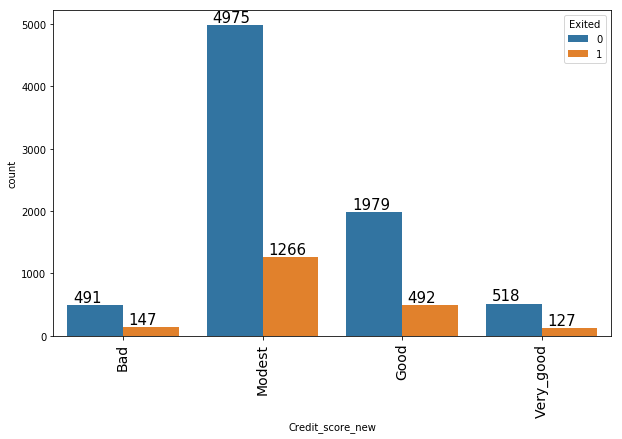

In [9]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Credit_score_new',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+50 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

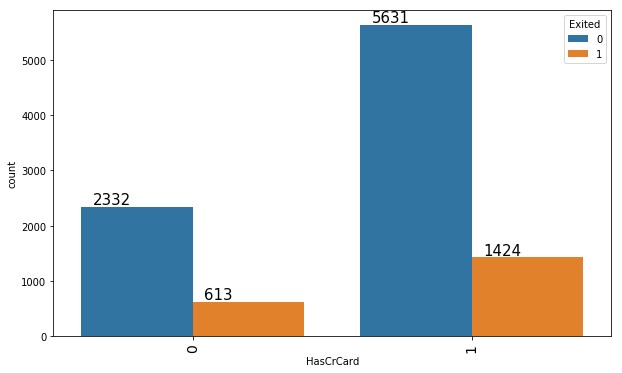

In [10]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='HasCrCard',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+50 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

In [11]:
dataset['SALARY']=pd.cut(dataset['EstimatedSalary'],bins=[0,50000,75000,100000,150000,200000],
labels=["V.Poor","Poor","Modest","Rich","Very Rich"])

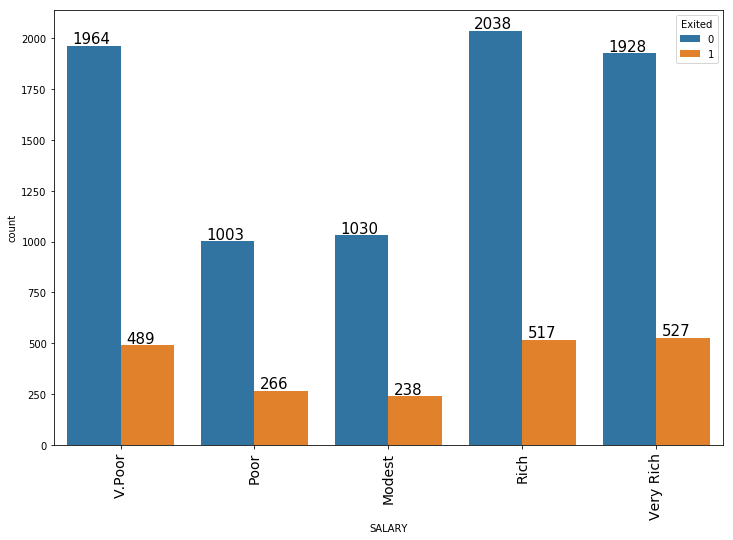

In [12]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='SALARY',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+10 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

In [13]:
dataset['AGE_NEW']=pd.cut(dataset['Age'],bins=[0,20,40,60,75,100],
labels=["Teenage","Adult","Old","Sr Citizen","Super sr citizen"])

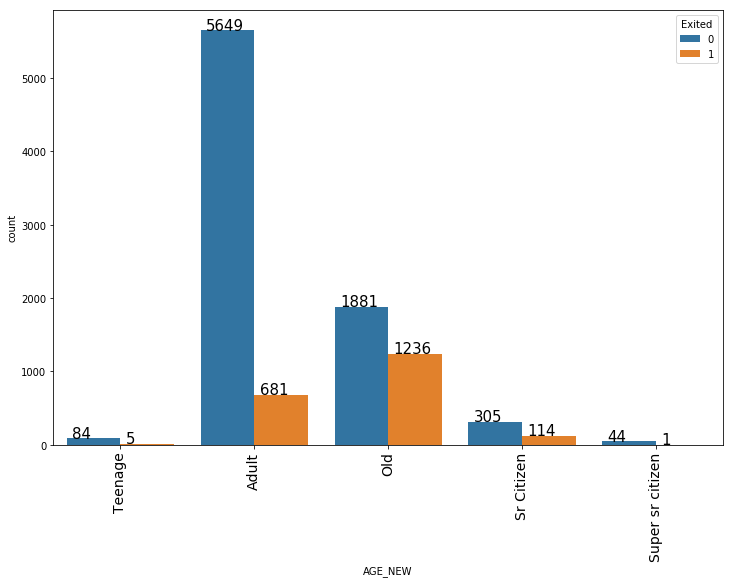

In [14]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='AGE_NEW',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+10 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

In [15]:
dataset.isnull().sum()/len(dataset.index)*100

RowNumber           0.00
CustomerId          0.00
Surname             0.00
CreditScore         0.00
Geography           0.00
Gender              0.00
Age                 0.00
Tenure              0.00
Balance             0.00
NumOfProducts       0.00
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited              0.00
Credit_score_new    0.05
SALARY              0.00
AGE_NEW             0.00
dtype: float64

In [16]:
dataset.drop(['Age','CreditScore','RowNumber'],axis=1,inplace=True)

In [17]:
dataset.drop('EstimatedSalary',axis=1,inplace=True)

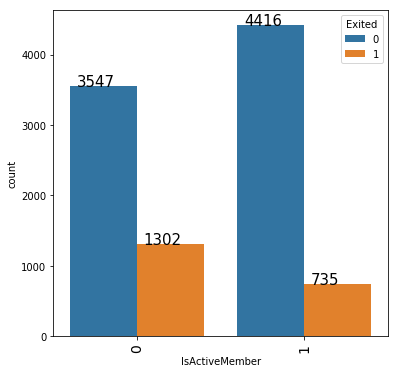

In [18]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='IsActiveMember',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+0.001 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

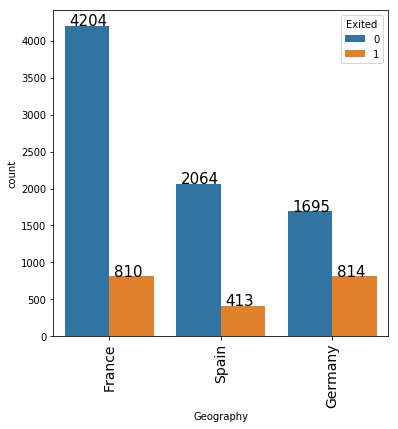

In [19]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='Geography',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+0.001 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

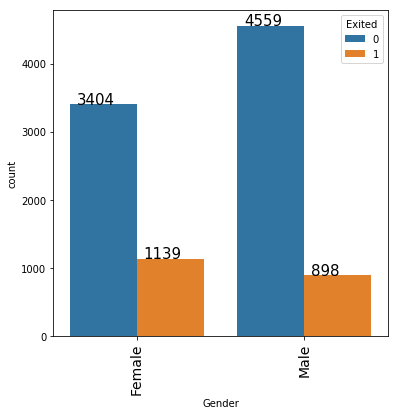

In [20]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='Gender',hue='Exited',data=dataset)
plt.xticks(rotation=90,fontsize=14)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+0.001 ,
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()

In [21]:
varlist =  ['Gender']
# Defining the map function
def binary_map(x):
    return x.map({'Female': 1, "Male": 0})

# Applying the function to the housing list
dataset[varlist] =dataset[varlist].apply(binary_map)
dataset.head()


,CustomerId,Surname,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Credit_score_new,SALARY,AGE_NEW
0,15634602,Hargrave,France,1,2,0.00,1,1,1,1,Modest,Rich,Old
1,15647311,Hill,Spain,1,1,83807.86,1,0,1,0,Modest,Rich,Old
2,15619304,Onio,France,1,8,159660.80,3,1,0,1,Modest,Rich,Old
3,15701354,Boni,France,1,1,0.00,2,0,0,0,Modest,Modest,Adult
4,15737888,Mitchell,Spain,1,2,125510.82,1,1,1,0,Very_good,Modest,Old


In [22]:
##Dropped those dummy variables, for which either created category or "unknown"
cred=pd.get_dummies(dataset['Credit_score_new'],prefix='cr')
cred=cred.drop('cr_Bad', axis=1)
dataset=pd.concat([dataset,cred], axis=1)


In [23]:
##Dropped those dummy variables, for which either created category or "unknown"
geo=pd.get_dummies(dataset['Geography'],prefix='gg')
geo=geo.drop('gg_France', axis=1)
dataset=pd.concat([dataset,geo], axis=1)


In [24]:
##Dropped those dummy variables, for which either created category or "unknown"
ag=pd.get_dummies(dataset['AGE_NEW'],prefix='yrs')
ag=ag.drop('yrs_Teenage', axis=1)
dataset=pd.concat([dataset,ag], axis=1)


In [25]:
##Dropped those dummy variables, for which either created category or "unknown"
sal=pd.get_dummies(dataset['SALARY'],prefix='sl')
sal=sal.drop('sl_Poor', axis=1)
dataset=pd.concat([dataset,sal], axis=1)


In [26]:
dataset.drop(['Gender','Geography','SALARY','AGE_NEW','Credit_score_new','Surname'],axis=1,inplace=True)

In [27]:
dataset.columns

Index(['CustomerId', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'cr_Modest', 'cr_Good', 'cr_Very_good',
       'gg_Germany', 'gg_Spain', 'yrs_Adult', 'yrs_Old', 'yrs_Sr Citizen',
       'yrs_Super sr citizen', 'sl_V.Poor', 'sl_Modest', 'sl_Rich',
       'sl_Very Rich'],
      dtype='object')

### Preprocessing of data.

In [28]:
X = dataset.drop(['CustomerId','Exited'],axis=1)
X.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,cr_Modest,cr_Good,cr_Very_good,gg_Germany,gg_Spain,yrs_Adult,yrs_Old,yrs_Sr Citizen,yrs_Super sr citizen,sl_V.Poor,sl_Modest,sl_Rich,sl_Very Rich
0,2,0.00,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1,1,83807.86,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
2,8,159660.80,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0.00,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,2,125510.82,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0


In [29]:
X.describe()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,cr_Modest,cr_Good,cr_Very_good,gg_Germany,gg_Spain,yrs_Adult,yrs_Old,yrs_Sr Citizen,yrs_Super sr citizen,sl_V.Poor,sl_Modest,sl_Rich,sl_Very Rich
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.012800,76485.889288,1.530200,0.70550,0.515100,0.624100,0.247100,0.064500,0.250900,0.247700,0.633000,0.311700,0.041900,0.004500,0.245300,0.126800,0.255500,0.245500
std,2.892174,62397.405202,0.581654,0.45584,0.499797,0.484379,0.431347,0.245654,0.433553,0.431698,0.482011,0.463211,0.200371,0.066934,0.430286,0.332765,0.436164,0.430405
min,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,97198.540000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,127644.240000,2.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y=dataset['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Encoding categorical data

In [31]:
converted=round((sum(dataset['Exited'])/len(dataset['Exited'].index))*100,2)
converted

20.37

In [32]:
cols=dataset.columns
dataset[cols]=dataset[cols].apply(pd.to_numeric,errors='coerce')

### Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [34]:
X_train.describe()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,cr_Modest,cr_Good,cr_Very_good,gg_Germany,gg_Spain,yrs_Adult,yrs_Old,yrs_Sr Citizen,yrs_Super sr citizen,sl_V.Poor,sl_Modest,sl_Rich,sl_Very Rich
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.980750,76076.504201,1.532375,0.707750,0.515875,0.621875,0.247750,0.065000,0.245125,0.247625,0.635875,0.310500,0.040750,0.004625,0.244250,0.126500,0.253625,0.247625
std,2.890142,62581.364700,0.577705,0.454825,0.499779,0.484949,0.431733,0.246541,0.430188,0.431660,0.481214,0.462727,0.197723,0.067854,0.429668,0.332433,0.435113,0.431660
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,96870.170000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,127540.865000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.000000,238387.560000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Scaling


In [35]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train[['Tenure','Balance','NumOfProducts']] = scaler.fit_transform(X_train[['Tenure','Balance','NumOfProducts']])

X_train.head()


C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,cr_Modest,cr_Good,cr_Very_good,gg_Germany,gg_Spain,yrs_Adult,yrs_Old,yrs_Sr Citizen,yrs_Super sr citizen,sl_V.Poor,sl_Modest,sl_Rich,sl_Very Rich
7389,0.006661,-1.215717,0.809503,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1
9275,-1.377440,-0.006312,-0.921591,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
2995,-1.031415,0.579935,-0.921591,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5316,0.006661,0.473128,-0.921591,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1
356,1.044737,0.810193,0.809503,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0


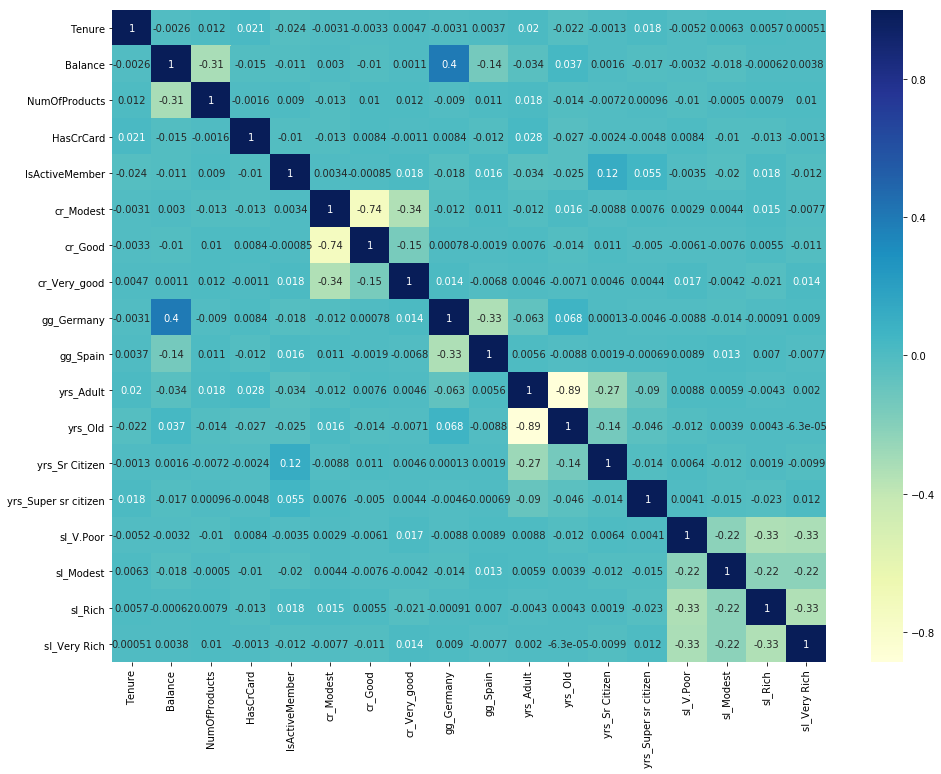

In [36]:
# the multi collinearity has been dealt with,plotting the heat map for the same.
plt.figure(figsize=(16,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [37]:
#X_train.head()

In [38]:
import statsmodels.api as sm

In [39]:
from sklearn import metrics

# Part 2 - Now let's make the ANN!

In [40]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


In [41]:
X_train_sm=sm.add_constant(X_train)
logm2= sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3403.4
Date:                Thu, 12 Sep 2019   Deviance:                       6806.9
Time:                        11:28:35   Pearson chi2:                 8.08e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7819      0.617     -4.510      0.000      -3.991      -1.573
Tenure                  -0.0664      0.030     -2.183      0.029      -0.126      -0.007
Balance                  0.1395      0.036      3.876      0.000       0.069       0.210
NumOfProducts           -0.0898      0.031     -2.919      0.004      -0.150      -0.030
HasCrCard               -0.0482      0.066     -0.725      0.468      -0.179       0.082
IsActiveMember          -0.8853      0.063    -14.036      0.000      -1.009      -0.762
cr_Modest               -0.1631      0.122     -1.342      0.180      -0.401       0.075
cr_Good                 -0.1341      0.130     -1.027      0.304      -0.390       0.122
cr_Very_good            -0.1990      0.168     -1.186      0.235      -0.528       0.130
gg_Germany               0.8043      0.076     10.521      0.000       0.654       0.954
gg_Spain                 0.1024      0.078      1.306      0.192      -0.051       0.256
yrs_Adult                0.9510      0.600      1.585      0.113      -0.225       2.127
yrs_Old                  2.6722      0.600      4.455      0.000       1.497       3.848
yrs_Sr Citizen           2.3677      0.613      3.865      0.000       1.167       3.568
yrs_Super sr citizen    -0.1522      1.185     -0.128      0.898      -2.475       2.171
sl_V.Poor                0.0141      0.105      0.134      0.893      -0.192       0.220
sl_Modest               -0.1378      0.122     -1.126      0.260      -0.378       0.102
sl_Rich                  0.0137      0.104      0.131      0.896      -0.190       0.218
sl_Very Rich             0.0744      0.104      0.715      0.475      -0.130       0.278
========================================================================================
"""

In [42]:
# getting the predicted value on train set
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

7389    0.108303
9275    0.483618
2995    0.149872
5316    0.152256
356     0.239544
49      0.254089
7931    0.480425
1523    0.207296
7552    0.021643
496     0.128167
dtype: float64

In [43]:
y_train_pred_final= pd .DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['CustomerId']= y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,CustomerId
7389,0,0.108303,7389
9275,0,0.483618,9275
2995,0,0.149872,2995
5316,0,0.152256,5316
356,0,0.239544,356


In [44]:
y_train_pred_final['predicted']= y_train_pred_final.Conversion_prob.map(lambda x:1 if x > 0.5 else 0 )

y_train_pred_final.head()

,Converted,Conversion_prob,CustomerId,predicted
7389,0,0.108303,7389,0
9275,0,0.483618,9275,0
2995,0,0.149872,2995,0
5316,0,0.152256,5316,0
356,0,0.239544,356,0


In [45]:
from sklearn import metrics

In [46]:
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[6174  194]
 [1299  333]]


In [47]:
## lets check accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.813375


In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

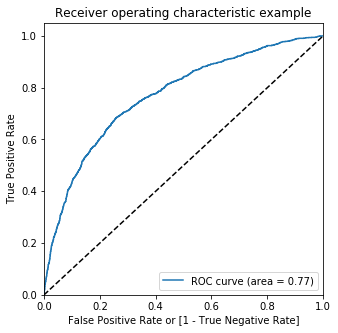

In [50]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [51]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,CustomerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7389,0,0.108303,7389,0,1,1,0,0,0,0,0,0,0,0
9275,0,0.483618,9275,0,1,1,1,1,1,0,0,0,0,0
2995,0,0.149872,2995,0,1,1,0,0,0,0,0,0,0,0
5316,0,0.152256,5316,0,1,1,0,0,0,0,0,0,0,0
356,0,0.239544,356,0,1,1,1,0,0,0,0,0,0,0


In [52]:
##  Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df= pd.DataFrame( columns= ['prob','acc','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob       acc     sensi     speci
0.0   0.0  0.204000  1.000000  0.000000
0.1   0.1  0.484750  0.896446  0.379240
0.2   0.2  0.703500  0.710172  0.701790
0.3   0.3  0.788125  0.530025  0.854271
0.4   0.4  0.805875  0.418505  0.905151
0.5   0.5  0.813375  0.204044  0.969535
0.6   0.6  0.808625  0.145221  0.978643
0.7   0.7  0.798125  0.014093  0.999058
0.8   0.8  0.796000  0.000000  1.000000
0.9   0.9  0.796000  0.000000  1.000000


## Initialising the ANN

In [53]:
classifier = Sequential()

# Adding the input layer and the first hidden layer

In [54]:
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
# classifier.add(Dropout(p = 0.1))


Instructions for updating:
Colocations handled automatically by placer.


### Adding the second hidden layer


In [55]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(p = 0.1))


In [56]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))


In [57]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))


### Adding the output layer


In [58]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


### Compiling the ANN


In [59]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### Fitting the ANN to the Training set


In [60]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 4s 441us/step - loss: 0.4365 - acc: 0.8149
Epoch 2/100
8000/8000 [==============================] - 2s 237us/step - loss: 0.3734 - acc: 0.8480
Epoch 3/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.3711 - acc: 0.8479
Epoch 4/100
8000/8000 [==============================] - 2s 216us/step - loss: 0.3679 - acc: 0.8475
Epoch 5/100
8000/8000 [==============================] - 2s 214us/step - loss: 0.3658 - acc: 0.8501
Epoch 6/100
8000/8000 [==============================] - 2s 219us/step - loss: 0.3660 - acc: 0.8484
Epoch 7/100
8000/8000 [==============================] - 2s 222us/step - loss: 0.3624 - acc: 0.8521
Epoch 8/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.3623 - acc: 0.8527
Epoch 9/100
8000/8000 [==============================] - 2s 222us/step - loss: 0.3629 - acc: 0.8520
Epoch 10/100
8000/8000 [============================

In [61]:
X_test[['Tenure','Balance','NumOfProducts']] = scaler.transform(X_test[['Tenure','Balance','NumOfProducts']])
X_test.head()

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,cr_Modest,cr_Good,cr_Very_good,gg_Germany,gg_Spain,yrs_Adult,yrs_Old,yrs_Sr Citizen,yrs_Super sr citizen,sl_V.Poor,sl_Modest,sl_Rich,sl_Very Rich
9394,1.044737,0.879303,-0.921591,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1
898,-1.031415,0.429722,-0.921591,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2398,1.044737,0.308583,-0.921591,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0
5906,-0.339364,0.575336,-0.921591,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2343,0.006661,1.389611,0.809503,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0


In [62]:
X_test_sm = sm.add_constant(X_test) 

In [63]:
## making predictions 
y_test_pred = res.predict(X_test_sm)

In [64]:
y_test_pred[:10]

9394    0.128675
898     0.139762
2398    0.239363
5906    0.128184
2343    0.123499
8225    0.459648
5506    0.063946
6451    0.061469
2670    0.164143
3497    0.454462
dtype: float64

In [65]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [66]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Exited
9394,0
898,1
2398,0
5906,0
2343,0


In [67]:
# Putting CustID to index
y_test_df['CustomerId'] = y_test_df.index
y_test_df.head()

,Exited,CustomerId
9394,0,9394
898,1,898
2398,0,2398
5906,0,5906
2343,0,2343


In [68]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_1.head()

,0
0,0.128675
1,0.139762
2,0.239363
3,0.128184
4,0.123499


In [69]:
y_test_df.head()

,Exited,CustomerId
0,0,9394
1,1,898
2,0,2398
3,0,5906
4,0,2343


In [70]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Exited,CustomerId,0
0,0,9394,0.128675
1,1,898,0.139762
2,0,2398,0.239363
3,0,5906,0.128184
4,0,2343,0.123499


In [71]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Exited,CustomerId,Conversion_Prob
0,0,9394,0.128675
1,1,898,0.139762
2,0,2398,0.239363
3,0,5906,0.128184
4,0,2343,0.123499


In [72]:
y_pred_final.Exited=y_test.values

In [73]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustomerId','Exited','Conversion_Prob'], axis=1)
y_pred_final.head()

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,CustomerId,Exited,Conversion_Prob
0,9394,0,0.128675
1,898,1,0.139762
2,2398,0,0.239363
3,5906,0,0.128184
4,2343,0,0.123499


In [74]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [75]:
# Let's check the overall accuracy.
#metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [76]:
y_pred_final.head()

,CustomerId,Exited,Conversion_Prob,final_predicted
0,9394,0,0.128675,0
1,898,1,0.139762,0
2,2398,0,0.239363,0
3,5906,0,0.128184,0
4,2343,0,0.123499,0


### Predicting the Test set results


In [77]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


### Making the Confusion Matrix


In [78]:
from sklearn.metrics import confusion_matrix
confusion= confusion_matrix(y_test, y_pred)

In [79]:
confusion

array([[1482,  113],
       [ 203,  202]], dtype=int64)

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.49876543209876545

In [82]:
# Let us calculate specificity
TN / float(TN+FP)

0.929153605015674

In [83]:
## precision= TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6412698412698413

In [84]:
#Recall=TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.49876543209876545

In [85]:
#  accuracy
TRUE=TP+TN
TRUE

1684

In [86]:
TOTAL=TP+TN+FP+FN
TOTAL

2000

In [87]:
#Accuracy
(TRUE/TOTAL)*100

84.2

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [89]:
y_pred_final.head()

,CustomerId,Exited,Conversion_Prob,final_predicted
0,9394,0,0.128675,0
1,898,1,0.139762,0
2,2398,0,0.239363,0
3,5906,0,0.128184,0
4,2343,0,0.123499,0


In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Exited, y_pred_final.Conversion_Prob, drop_intermediate = False )

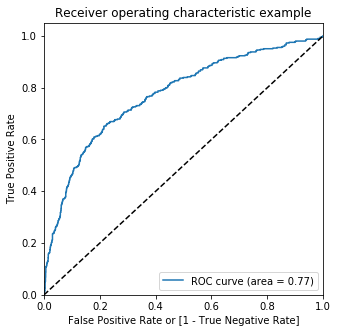

(array([0.00000000e+00, 6.26959248e-04, 6.26959248e-04, ...,
        9.99373041e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.        , 0.        , 0.00246914, ..., 0.99753086, 0.99753086,
        1.        ]),
 array([1.73453654, 0.73453654, 0.72451712, ..., 0.01678003, 0.01675744,
        0.01525766]))

In [91]:
draw_roc(y_pred_final.Exited, y_pred_final.Conversion_Prob)

In [92]:
## Calculating area under yhe curve.
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [93]:
auc= auc_val(fpr,tpr)
auc

0.7716660861488565

In [94]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001, ]}

folds=5


lasso= Lasso()
model_cv= GridSearchCV(estimator=lasso, param_grid=params , scoring='neg_mean_absolute_error',
                       cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [95]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha'] <=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050789,0.006283,0.003023,0.003703,0.0001,{'alpha': 0.0001},-0.278227,-0.279751,-0.270630,-0.277980,...,-0.276234,0.003272,5,-0.274712,-0.274601,-0.277271,-0.274713,-0.276256,-0.275511,0.001073
1,0.029606,0.010258,0.001106,0.001755,0.0002,{'alpha': 0.0002},-0.278290,-0.279751,-0.270380,-0.277913,...,-0.276172,0.003364,4,-0.274659,-0.274572,-0.277230,-0.274637,-0.276228,-0.275465,0.001080
2,0.024939,0.003715,0.001651,0.001914,0.0003,{'alpha': 0.0003},-0.278307,-0.279741,-0.270326,-0.277914,...,-0.276159,0.003384,2,-0.274664,-0.274574,-0.277248,-0.274625,-0.276240,-0.275470,0.001088
3,0.024141,0.004802,0.001588,0.002284,0.0004,{'alpha': 0.0004},-0.278330,-0.279745,-0.270327,-0.277921,...,-0.276162,0.003391,3,-0.274681,-0.274593,-0.277281,-0.274625,-0.276254,-0.275487,0.001095
4,0.032667,0.005074,0.002239,0.002354,0.0005,{'alpha': 0.0005},-0.278345,-0.279758,-0.270329,-0.277902,...,-0.276157,0.003397,1,-0.274699,-0.274618,-0.277307,-0.274626,-0.276264,-0.275503,0.001098


In [96]:
## plotting mean test and train score for aplha
#cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
#plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
#plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
#plt.xlabel('alpha')
#plt.ylabel('Negative Mean Absolute Error')
#plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
#plt.show()

In [97]:
model_cv.best_score_

-0.2761566485210756

In [98]:
model_cv.best_params_

{'alpha': 0.0005}

In [99]:
alpha=0.0005

lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
lasso.coef_

array([-0.00829612,  0.01628539, -0.01289904, -0.00218099, -0.11971566,
       -0.00419712, -0.        , -0.00216958,  0.12572082,  0.00829461,
       -0.        ,  0.27560252,  0.17970648, -0.        ,  0.        ,
       -0.01625236, -0.        ,  0.00689999])

In [101]:
X_train=pd.DataFrame(X_train)

In [102]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [103]:
main_coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected= sum(lasso.coef_!=0)
print("the num of feautes selected by lasso : ",var_selected)

the num of feautes selected by lasso :  13


In [104]:
main_features=pd.concat([main_coef.sort_values(ascending=False).head(10),main_coef.sort_values(ascending=False).tail(10)])
main_features

yrs_Old                 0.275603
yrs_Sr Citizen          0.179706
gg_Germany              0.125721
Balance                 0.016285
gg_Spain                0.008295
sl_Very Rich            0.006900
yrs_Super sr citizen   -0.000000
yrs_Adult              -0.000000
sl_V.Poor               0.000000
sl_Rich                -0.000000
sl_V.Poor               0.000000
sl_Rich                -0.000000
cr_Good                -0.000000
cr_Very_good           -0.002170
HasCrCard              -0.002181
cr_Modest              -0.004197
Tenure                 -0.008296
NumOfProducts          -0.012899
sl_Modest              -0.016252
IsActiveMember         -0.119716
dtype: float64